# Examination of Digital Community Conversations Within Specific Disease States Via Reddit

- **Vision**: Development of a repeatable process for the analysis of Reddit conversations
within specific condition and/or disease state with applicable threads and subreddit
threads (subreddits) to potentially inform strategy and content development. Create a
simplified and repeatable process that does not require the users to be fluent in Reddit.
- **Issue**: While Reddit offers robust, open, and community-minded discussions surrounding
conditions and disease states, Reddit also provides volumes of unstructured and
unclassified data. The development of a repeatable process – that continues to monitor
evolving conversations over time – currently requires multiple tools (ex. – tools to scrape
threads, tools to analyze keyword content, tools to analyze sentiment, etc.).
- **Method**: After identifying priority conditions and/or disease states with active Reddit
communities (ex. – prostate cancer, breast cancer, HIV, etc.), build relational taxonomy
(ex. – medicine, treatment, and adherence all have specific topics but have relational
discussions) of topical themes addressed within.
- **Potential Output**: Provide use case for healthcare companies on the importance of
Reddit as an early source of social indicator of trends and conversational “lexicon” to be
used for patient communications and programs.

# <font color='Green'><center>Milestone 3: Modelling</font>

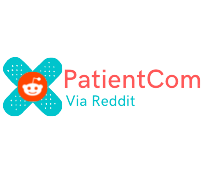

In [1]:
from IPython.display import Image
Image(filename='img/logo.png')

In [3]:
'''
Needed librairies
'''
import requests
import pandas as pd
import numpy as np

'''
Data analysis and Wrangling
'''
import pandas as pd
import numpy as np
import random as rnd
from datetime import date, datetime, time, timedelta
import datetime as dt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mtic
import matplotlib.pyplot as plot
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# Iextras

import nltk
import matplotlib.pyplot as plt
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from string import punctuation
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer


In [4]:
'''
Importing the data from: dataset-milestone1
'''
#from dataset_milestone1 import df
from cancer_dataset import cancer as df

C:\Users\rmastour\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [5]:
df.tail()

,title,score,id,subreddit,url,num_comments,body,created,UID,comments
66,Today is my 10th Cancerversay - diagnosed with...,202,jlosty,cancer,https://www.reddit.com/r/cancer/comments/jlost...,35,I (38M) got my biopsy results 10 years ago on ...,2020-10-31 19:46:51+00:00,96,...
67,Male cancer nurse here,199,jkk09e,cancer,https://www.reddit.com/r/cancer/comments/jkk09...,36,I have a patient. 30M with Metastatic Rhabdomy...,2020-10-29 22:10:21+00:00,97,...
68,I’m kicking colon cancer’s ass one day at a time!,201,apkwpq,cancer,https://www.reddit.com/r/cancer/comments/apkwp...,33,I had surgery on Friday to remove the cancerou...,2019-02-11 20:56:26+00:00,98,...
69,"Hi, I'm NED!!",200,l7xc0p,cancer,https://www.reddit.com/r/cancer/comments/l7xc0...,44,Last year I was diagnosed with Stage 4 bowel c...,2021-01-29 16:46:41+00:00,99,...
70,"""Currently, you no longer have cancer cells in...",198,hqbplk,cancer,https://www.reddit.com/r/cancer/comments/hqbpl...,57,I was diagnosed with ovarian cancer stage 2b a...,2020-07-13 08:40:21+00:00,100,...


In [6]:
#df  = df.comments.iloc[:][1]

In [170]:
import pandas as pd
import praw
from praw.models import MoreComments

reddit = praw.Reddit(client_id='5PtLw2OXKn8K-lTmDq8WaA',
     client_secret='jxi9Ob2bO6axkXP_eKKQH4tFO5t9Rg',
     username='raymastouri',
     password='M@$t0ur1198700rq',
     user_agent='PatientCom/0.0.1'
)

top_post = []
subreddit = reddit.subreddit('cancer')
for post in subreddit.top(limit=None):
    comments = []
    for comment in post.comments:
        if isinstance(comment, MoreComments):
            continue        
        comments.append(comment.body)
    top_post.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,comments])
top_posts = pd.DataFrame(top_post,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','comments'])

In [258]:
top_posts

,title,score,id,subreddit,url,num_comments,body,created,comments
0,Today is the Day After - Resectioning Surgery ...,633,gsrovh,cancer,https://i.imgur.com/8bc83Eu.jpg,81,,1.590754e+09,[All the best and good luck for the future.Bes...
1,I’m not ready.,612,9isza1,cancer,https://www.reddit.com/r/cancer/comments/9isza...,82,In 2016 I was diagnosed with stage 4 of a seve...,1.537888e+09,[Have you thought about making a video and lea...
2,"I’ve got 2-4 weeks to live, we’re in the end g...",581,m1h5h5,cancer,https://www.reddit.com/r/cancer/comments/m1h5h...,150,Hey everyone you might have seen my post on he...,1.615326e+09,[How's your appetite? You should try a bunch o...
3,Dr. gave me 11% survival rate. I give myself a...,501,cfdqdl,cancer,https://imgur.com/El4KQQb,57,,1.563573e+09,[Nice. I had 15% three years ago to make it on...
4,It's been a difficult year with my husband bat...,478,my9u3m,cancer,https://www.reddit.com/gallery/my9u3m,34,,1.619362e+09,[Awww looks like he's got a pretty good friend...
...,...,...,...,...,...,...,...,...,...
995,Mum had her final Chemo session!,80,d2oj61,cancer,https://www.reddit.com/r/cancer/comments/d2oj6...,27,She got to ring a mini bell and everyone clapp...,1.568201e+09,[Congrats! One of the reasons I joined this su...
996,I can’t walk anymore.,76,ctr56w,cancer,https://www.reddit.com/r/cancer/comments/ctr56...,31,"The chemo has taken my hearing, my teeth, and ...",1.566441e+09,[I’m so sorry for you. It’s a brutal disease. ...
997,Stage IV Colon Cancer w/Mets 'tis but a scratch,80,cewkw5,cancer,https://www.reddit.com/r/cancer/comments/cewkw...,28,"Went to meet my Radiation Oncologist, yesterda...",1.563476e+09,"[Great news! Thats really so great, getting to..."
998,Ayyy beat cancer in 2 cycles,81,bsmpc3,cancer,https://www.reddit.com/r/cancer/comments/bsmpc...,24,"My doctors just called, they don't see anythin...",1.558734e+09,"[That's great news!! Congrats. :), Congratulat..."


In [259]:
df = top_posts.copy()

In [260]:
'''
Making copies for the 3 modeling tasks 
'''
df_model1= df.copy()
df_model2= df.copy()
df_model3= df.copy()

In [261]:
data = df.copy

In [262]:
# Convert to list
import pprint

df = df_model1.title.values.tolist()

df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]

# Remove new line characters
df = [re.sub('\s+', ' ', sent) for sent in df]

# Remove distracting single quotes
df = [re.sub("\'", "", sent) for sent in df]

df[:1]

['Today is the Day After - Resectioning Surgery Complete. I am Cancer Free.']

In [263]:
df = [re.sub("-", " ", sent) for sent in df]
df = [re.sub(":", "", sent) for sent in df]

In [264]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(df))

In [265]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [266]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [267]:
# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [268]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [270]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[10:11]]

[[('pain', 1),
  ('year', 1),
  ('lose', 1),
  ('alveolar', 1),
  ('angel', 1),
  ('complication', 1),
  ('daughter', 1),
  ('drug', 1),
  ('feel', 1),
  ('goodbye', 1),
  ('iv', 1),
  ('make', 1),
  ('night', 1),
  ('old', 1),
  ('poke', 1),
  ('sick', 1),
  ('stage', 1),
  ('sweet', 1),
  ('treatment', 1),
  ('tube', 1)]]

In [271]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [272]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.065*"mom" + 0.043*"die" + 0.023*"week" + 0.022*"passed_away" + 0.020*"live" + 0.019*"come" + 0.019*"tell" + 0.019*"people" + 0.015*"lose" + 0.014*"wife"'), (1, '0.085*"cancer" + 0.039*"fuck" + 0.019*"post" + 0.018*"feel" + 0.017*"lung" + 0.015*"need" + 0.014*"really" + 0.014*"morning" + 0.014*"share" + 0.013*"new"'), (2, '0.054*"dad" + 0.025*"time" + 0.024*"die" + 0.023*"pass" + 0.019*"love" + 0.015*"hard" + 0.013*"finish" + 0.012*"long" + 0.012*"hospital" + 0.011*"death"'), (3, '0.050*"chemo" + 0.039*"good" + 0.030*"treatment" + 0.028*"go" + 0.026*"news" + 0.023*"diagnose" + 0.018*"day" + 0.018*"today" + 0.017*"start" + 0.017*"get"'), (4, '0.141*"cancer" + 0.060*"today" + 0.060*"year" + 0.039*"lose" + 0.033*"stage" + 0.030*"m" + 0.022*"battle" + 0.021*"month" + 0.020*"fight" + 0.017*"free"')]


In [273]:
# Compute Perplexity

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.694447592982957

Coherence Score:  0.45074978393476445


In [177]:
'''
NLP Librairies
'''
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim 
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Topic modeling using NLTK and Gensim


Popular topic modeling algorithms include Latent Semantic Analysis (LSA) a.k.a Latent Semantic Indexing , Hierarchical Dirichlet Process (HDP), Latent Dirichlet Allocation (LDA) and Non-negative Matrix factorization among which LDA has shown great results in practice and therefore widely adopted. We'll look at them all one by one. Lets get to it.

    Latent Semantic Analysis
    Latent Dirichlet Allocation
    Hierarchical Dirichlet Process
    Non-negative Matrix factorization



Stopwords are words that are commonly used. Using the popular NLTK package in python, lets import the stopwords in the english language
and save it. It'll be used later for modeling purposes

In [178]:
# NLTK Stop words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])

The extended stopwords list from the scikit learn library

In [179]:
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']

In [180]:
stop_words.extend(st1)

In [181]:
'''
break out data from nested columns 
'''
df['comments'].iloc[:][70]

['Score! Immunotherapy is amazing! Congratulations!',
 "That's awesome! Immunotherapy is such a blessing for far too few of us. So exciting to always hear a success.",
 'amazing news!!! my dad is Ned with immunotherapy after 1.5 years too! nsclc',
 "Great news!  Here's to continuing on the path to being cancer free.",
 "ROCK ON! That's such wonderful news, congrats!",
 'Fan-freaking-tastic happy for you!',
 'Thank you for posting this. I am 2 immunotherapy treatments in for metastatic melanoma. This gives me hope!',
 '$IBRX is curing cancer.  Literally',
 'Congrats OP that is amazing news! If I can ask, what stage were you diagnosed at? I am getting staged tomorrow and am trying to shake the nervousness.',
 'Calls for a celebration!',
 '[removed]',
 "Congratulations! I'm happy for you. Please continue on living a good life.",
 "I have Stage 4 Kidney cancer with metastasis to the lung, liver and remaining kidney.  The combination of Opdivo and Yervoy worked wonders for me reducing all t

In [315]:
df.comments.iloc[:][70]

AttributeError: 'list' object has no attribute 'comments'

# Latent Dirichlet Allocation (LDA)

In [276]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='tsne', sort_topics=True)



topic_data =  pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds = 'pcoa', sort_topics=True)
pyLDAvis.display(topic_data)

C:\Users\rmastour\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [240]:
pyLDAvis.display(panel)

In [278]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [279]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=6, step=1)

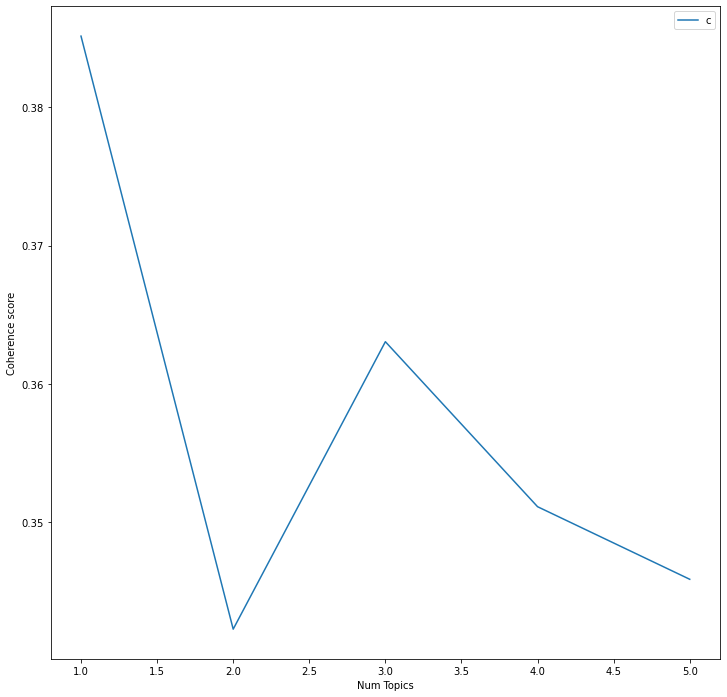

In [280]:
limit=6; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [281]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3851
Num Topics = 2  has Coherence Value of 0.3423
Num Topics = 3  has Coherence Value of 0.3631
Num Topics = 4  has Coherence Value of 0.3511
Num Topics = 5  has Coherence Value of 0.3459


In [282]:
# Select the model and print the topics

optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.027*"good" + 0.022*"news" + 0.022*"cancer" + 0.019*"go" + 0.012*"today" + 0.010*"treatment" + 0.009*"dad" + 0.008*"live" + 0.008*"stage" + 0.008*"end"'), (1, '0.054*"cancer" + 0.020*"mom" + 0.019*"today" + 0.014*"month" + 0.013*"lose" + 0.013*"chemo" + 0.010*"pass" + 0.010*"get" + 0.010*"remission" + 0.009*"go"'), (2, '0.072*"cancer" + 0.024*"day" + 0.021*"today" + 0.017*"stage" + 0.016*"fuck" + 0.012*"die" + 0.012*"mom" + 0.011*"dad" + 0.011*"time" + 0.010*"diagnose"'), (3, '0.065*"cancer" + 0.038*"year" + 0.022*"today" + 0.019*"free" + 0.018*"chemo" + 0.018*"m" + 0.018*"lose" + 0.017*"die" + 0.013*"dad" + 0.011*"battle"')]


In [283]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
   
    sent_topics_df = pd.DataFrame()

   
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # -- dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
    

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9026,"cancer, year, today, free, chemo, m, lose, die...",Today is the Day After Resectioning Surgery ...
1,1,1.0,0.6133,"cancer, mom, today, month, lose, chemo, pass, ...",I’m not ready.
2,2,0.0,0.8902,"good, news, cancer, go, today, treatment, dad,...","I’ve got 2 4 weeks to live, we’re in the end g..."
3,3,2.0,0.9150,"cancer, day, today, stage, fuck, die, mom, dad...",Dr. gave me 11% survival rate. I give myself a...
4,4,0.0,0.8381,"good, news, cancer, go, today, treatment, dad,...",Its been a difficult year with my husband batt...


# HDP Model: Hierarchical Dirichlet Process

HDP is a nonparametric Bayesian approach to clustering grouped data. It uses a Dirichlet process for each group of data, with the Dirichlet processes for all groups sharing a base distribution which is itself drawn from a Dirichlet process

In [284]:

from gensim.models import CoherenceModel, HdpModel
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)


In [285]:

hdptopics = hdpmodel.show_topics(formatted=False)

In [286]:
hdptopics[0]

(0,
 [('terminally', 0.005625369139039801),
  ('triple', 0.004761234502246676),
  ('pump', 0.004639498143978069),
  ('hat', 0.004420150637132751),
  ('node', 0.004316802492347698),
  ('complete', 0.004254281732504364),
  ('follower', 0.004180249057175427),
  ('aaaaaaaannnnd', 0.004139752668167433),
  ('iiib', 0.003992478953877581),
  ('liver', 0.0039649949532482),
  ('havoc', 0.0037714378430340227),
  ('miracle', 0.0036874014380885466),
  ('papillary', 0.003594719881685823),
  ('realise', 0.0035791204743199152),
  ('mom', 0.00350878993885292),
  ('clear', 0.0034946203658429483),
  ('person', 0.0034255314797677202),
  ('curable', 0.0033670696021940952),
  ('mother', 0.0033204722397324636),
  ('description', 0.0032861795095484795)])

In [287]:
len(hdptopics)

20

# NMF model: Non-Negative Matrix Factorization

It is a group of algorithms where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect.


In [291]:
from nltk.corpus import stopwords;
import nltk;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
title = df_model1.title
vectorizer = CountVectorizer(analyzer='word', max_features=5000, stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}');
x_counts = vectorizer.fit_transform(title);
print( "Created %d X %d document-term matrix" % (x_counts.shape[0], x_counts.shape[1]) )
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

Created 1000 X 1483 document-term matrix


In [292]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 1483 distinct terms


In [293]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)
model = NMF(n_components=5, init='nndsvd');
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [294]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [295]:
num_topics = 5
nmf_df = get_nmf_topics(model, 5)
nmf_df

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,cancer,fuck,chemo,lost,remission
1,free,cancer,treatment,mom,year
2,stage,life,day,today,officially
3,like,bell,today,dad,later
4,year,osteosarcoma,finished,died,months
5,years,anti-vaxxers,port,passed,pet
6,officially,muffins,buddy,years,scans
7,beat,corona,post,away,scan
8,surgery,christmas,session,yesterday,today
9,feels,youuuu,officially,fight,told


In [296]:
raw_documents = title.str.strip()
raw_documents= raw_documents.str.lower()
raw_documents = raw_documents.tolist()
raw_doc1 = [i.split() for i in raw_documents]

In [297]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = stop_words, min_df = 20) #custom_stop_words
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Created 1000 X 31 document-term matrix


In [298]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 31 distinct terms


In [299]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words= stop_words, min_df = 20) #custom_stop_words
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 1000 X 31 TF-IDF-normalized document-term matrix


In [300]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [301]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. cancer (169.93)
02. today (62.22)
03. chemo (53.05)
04. dad (42.38)
05. mom (39.15)
06. lost (35.83)
07. stage (33.60)
08. fuck (33.42)
09. year (29.26)
10. day (29.18)
11. free (27.79)
12. years (27.36)
13. passed (27.09)
14. treatment (23.78)
15. time (23.12)
16. wife (22.69)
17. died (20.83)
18. good (20.49)
19. news (19.74)
20. like (19.69)


In [302]:
k = 10
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [303]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

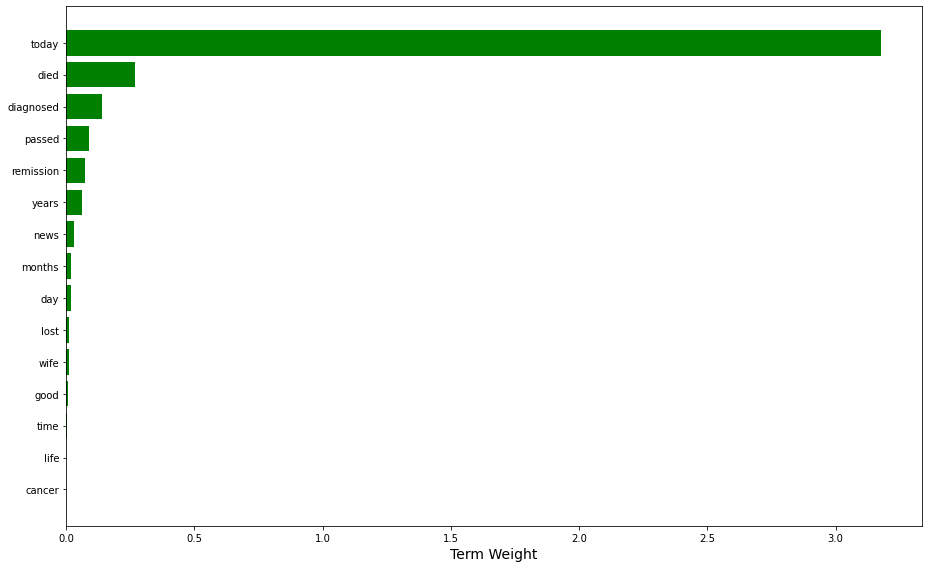

In [304]:
plot_top_term_weights( terms, H, 1, 15 )

# Evaluation

In [309]:
lsimodel = LsiModel(corpus=corpus, num_topics=5, id2word=id2word)
lsitopics = lsimodel.show_topics(formatted=False)

ldatopics = lda_model.show_topics(formatted=False)

In [310]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsitopics]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdptopics]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

In [311]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

In [312]:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.figure(figsize=(12,12))
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

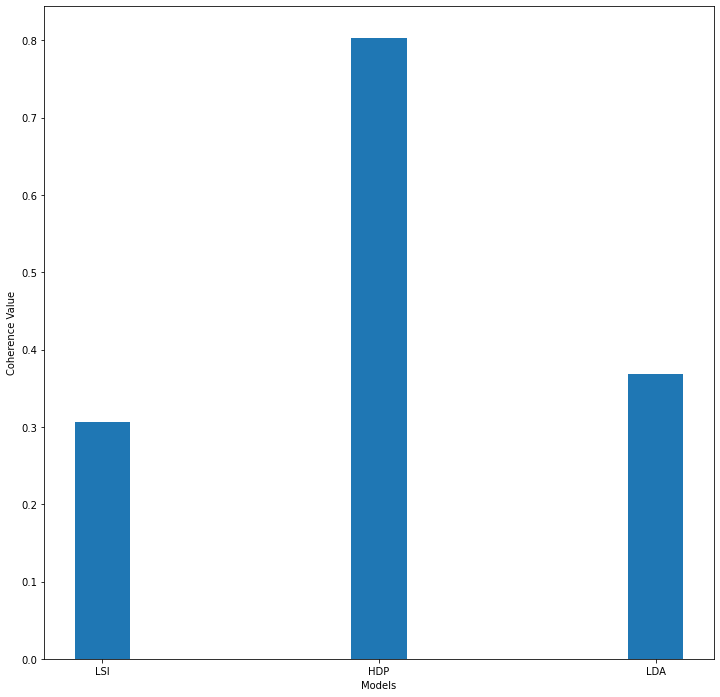

In [313]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

# Sentiment Analysis
### Would be done via GPT-3

In [ ]:
df['Sujectivity'] = df['lemmatized_comment'].apply(getSubjectivity)
df['Polarity'] = df['lemmatized_comment'].apply(getPolarity)
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

In [ ]:
'''
Visualization: Sentiment Analysis Plot
- Reddit: Sentiment Polarity
- Negative, Neutral and Positive
'''

In [ ]:
'''
K-MEANS Clustering: Polarity vs Subjectivity
'''

# Application & Insights: Next Milestone
### Data -> Features -> Model -> Insights

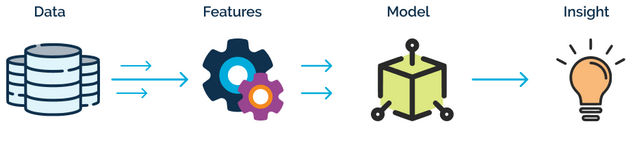

In [277]:
Image(filename='img/roadmap.png')

In [ ]:
'''
Examples: https://dash.gallery/Portal/\
similar project: https://dash.gallery/dash-cytoscape-lda/
river: https://github.com/online-ml/river
'''

In [ ]:
'''
References:
- https://www.kaggle.com/akashram/topic-modeling-intro-implementation/notebook
- https://www.kaggle.com/irfanmansuri/nlp-reddit
- GPT-3: 
- Medium: https://medium.com/analytics-vidhya/scraping-reddit-using-python-reddit-api-wrapper-praw-5c275e34a8f4
'''

In [ ]:
'''
lemmatization: https://www.reddit.com/r/learnpython/comments/ostea3/problem_using_pandas_to_import_excel_sheet_to/
'''

In [ ]:
import pytextrank, spacy
import scattertext as st
import numpy as np


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp.add_pipe("textrank", last=True)


#Dataset 
convention_df = st.SampleCorpora.ConventionData2012.get_data(
).assign(
    parse=lambda df: df.text.apply(nlp),
    party=lambda df: df.party.apply(
        {'disease': 'vaccin', 
         'covid': 'medication'}.get
    )
)


corpus = st.CorpusFromParsedDocuments(
    convention_df,
    category_col='party',
    parsed_col='parse',
    feats_from_spacy_doc=st.PyTextRankPhrases()
).build(
).compact(
    st.AssociationCompactor(2000, use_non_text_features=True)
)

In [318]:
"0" + "5"

'05'

In [319]:
"hippo" *12

'hippohippohippohippohippohippohippohippohippohippohippohippo'

This week's total sales: 529.0
